<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl2.png">


# 0. Librerías básicas

## 📌 Instrucciones

1. Ejecute **todas las celdas** de la notebook **`PruebaDeLibrerias.ipynb`**.  
   Este archivo tiene como objetivo **verificar que todas las librerías necesarias para la primera parte del curso estén correctamente instaladas y funcionando correctamente**.

2. Tome en cuenta que la librería **MediaPipe** **solo es compatible con ciertas versiones de Python**, por lo que deberá asegurarse de utilizar una versión soportada para evitar errores durante la ejecución.

3. **Ejercicio adicional:**  
   Cambie la imagen **`persona.png`** por **otra imagen distinta** en la que **aparezca únicamente una persona**, y ejecute nuevamente las celdas correspondientes para comprobar el correcto funcionamiento del código.

4. Al finalizar, **suba nuevamente la notebook `PruebaDeLibrerias.ipynb`** con todas las celdas ejecutadas.

5. **No se aceptarán archivos comprimidos** (por ejemplo: `.zip`, `.rar`).

---

## 🧮 NumPy
**NumPy** es la librería base para el **cómputo numérico en Python**.

- Manejo de arreglos multidimensionales (`ndarray`)
- Operaciones matemáticas rápidas y vectorizadas
- Base del ecosistema de ciencia de datos

**Usos comunes:** álgebra lineal, estadística, simulaciones numéricas.

---

## 📊 Pandas
**Pandas** se utiliza para la **manipulación y análisis de datos estructurados**.

- Introduce los objetos `DataFrame` y `Series`
- Lectura y escritura de archivos CSV, Excel y bases de datos
- Limpieza, filtrado y transformación de datos

**Usos comunes:** análisis de datos, ciencia de datos, ETL.

---

## 📈 Matplotlib
**Matplotlib** es la librería estándar para la **visualización de datos en Python**.

- Gráficas 2D (líneas, barras, dispersión, histogramas)
- Personalización de ejes, títulos y etiquetas
- Integración con NumPy y Pandas

**Usos comunes:** visualización exploratoria de datos y resultados científicos.

---

## 🤖 Scikit-learn (sklearn)
**Scikit-learn** es la librería principal para **Machine Learning clásico** en Python.

- Algoritmos de clasificación, regresión y clustering
- Herramientas de validación, métricas y pipelines
- Preprocesamiento de datos

**Usos comunes:** modelos predictivos, análisis estadístico, aprendizaje automático tradicional.

---

## 👁️ OpenCV (cv2)
**OpenCV** es una librería de **visión por computadora**.

- Procesamiento de imágenes y video
- Detección de bordes, contornos y objetos
- Captura y análisis de video en tiempo real

**Usos comunes:** visión artificial, robótica, inspección visual.

---

## ✋ MediaPipe
**MediaPipe** es una librería desarrollada por Google para **detección y seguimiento de características humanas en tiempo real**.

- Detección de manos, rostro, pose y cuerpo
- Modelos optimizados para CPU y GPU
- Integración con OpenCV y NumPy

**Usos comunes:** reconocimiento de gestos, interacción humano–computadora.

### Versiones de Python compatibles con MediaPipe
- Python **3.9**
- Python **3.10**
- Python **3.11**
- Python **3.12**

⚠️ *No recomendado:*  
- Python **3.13** (sin soporte oficial)
- Python **≤ 3.8** (compatibilidad limitada u obsoleta)


In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import mediapipe as mp
import pandas as pd

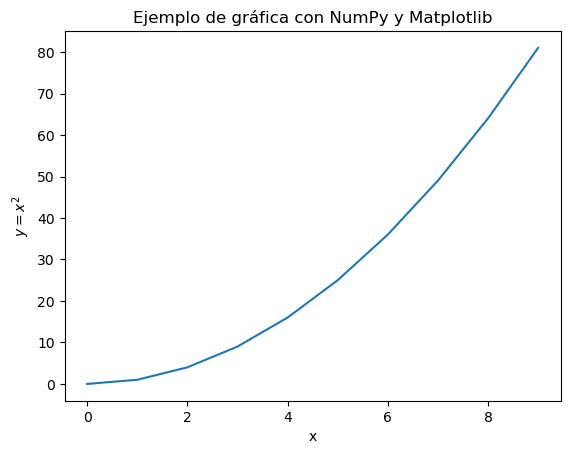

In [2]:
# Crear un arreglo con numpy
x = np.arange(0, 10, 1)
y = x ** 2

# Crear la gráfica
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel(r"$y = x^2$")
plt.title("Ejemplo de gráfica con NumPy y Matplotlib")
plt.show()

In [3]:
import pandas as pd

# Crear un DataFrame simple
data = {
    "Nombre": ["Ana", "Luis", "María"],
    "Edad": [23, 30, 27],
    "Ciudad": ["Mérida", "CDMX", "Guadalajara"]
}

df = pd.DataFrame(data)

df

,Nombre,Edad,Ciudad
0,Ana,23,Mérida
1,Luis,30,CDMX
2,María,27,Guadalajara


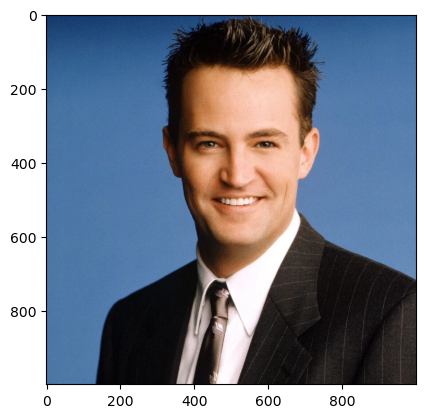

In [4]:
#Desplegar la imagen de la carpeta imagenes el archivo llamado manos.jpg
img = cv.imread('imagenes/persona2.png')
#Convertir la imagen de BGR a RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#Mostrar la imagen
plt.imshow(img_rgb)
plt.show()

c:\Users\Chava\miniconda3\envs\DL-venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


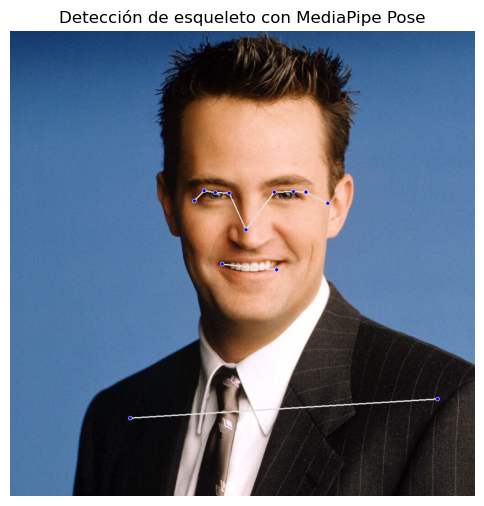

In [5]:

# Inicializar MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(
    static_image_mode=True,   # Para imágenes (no video)
    model_complexity=2,
    enable_segmentation=False,
    min_detection_confidence=0.5
)

# Leer la imagen
img = cv.imread("imagenes/persona2.png")

# Convertir de BGR a RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Procesar la imagen
results = pose.process(img_rgb)

# Dibujar el esqueleto si se detecta una persona
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        img_rgb,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS
    )

# Mostrar la imagen
plt.figure(figsize=(6, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Detección de esqueleto con MediaPipe Pose")
plt.show()



In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Crear datos con NumPy
# -----------------------------
np.random.seed(42)

X = np.random.rand(100, 1) * 10   # Variable independiente
y = 3 * X.squeeze() + 5 + np.random.randn(100)  # y = 3x + 5 + ruido

# -----------------------------
# 2. Convertir a DataFrame (Pandas)
# -----------------------------
df = pd.DataFrame({
    "X": X.squeeze(),
    "y": y
})

print(df.head())

# -----------------------------
# 3. Separar variables
# -----------------------------
X_df = df[["X"]]   # Feature (siempre 2D)
y_df = df["y"]     # Target

# -----------------------------
# 4. Train / Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Crear y entrenar el modelo
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 6. Predicción
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 7. Evaluación
# -----------------------------
mse = mean_squared_error(y_test, y_pred)

print("Coeficiente (pendiente):", model.coef_[0])
print("Intercepto:", model.intercept_)
print("Error cuadrático medio (MSE):", mse)


          X          y
0  3.745401  16.323251
1  9.507143  33.222422
2  7.319939  27.051579
3  5.986585  20.972186
4  1.560186   9.460887
Coeficiente (pendiente): 2.9598647314960562
Intercepto: 5.142913319458563
Error cuadrático medio (MSE): 0.6536995137170016
